In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
file = "data/steam.csv"
games_df = pd.read_csv(file)
games_df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


# Basic Pricing Info

In [3]:
# get data about free games and most expensive games

most_expensive = games_df.loc[games_df['price'].idxmax()]
free_games = games_df.loc[games_df['price'] == 0.0]
print("As of May 2019, The most expensive game was {}, with a price of ${}".format(most_expensive.loc['name'], most_expensive.loc['price']))
print("There are {} free games, out of a total of {} games, which is approximately {}% of games available on the store".format(len(free_games), len(games_df), round(len(free_games)/len(games_df),2)*100))
print("The mean average price is: ${}".format(round(games_df['price'].mean(),2)))
print("The median average price is: ${}".format(round(games_df['price'].median(),2)))

As of May 2019, The most expensive game was ADR-Labelling Game, with a price of $421.99
There are 2560 free games, out of a total of 27075 games, which is approximately 9.0% of games available on the store
The mean average price is: $6.08
The median average price is: $3.99


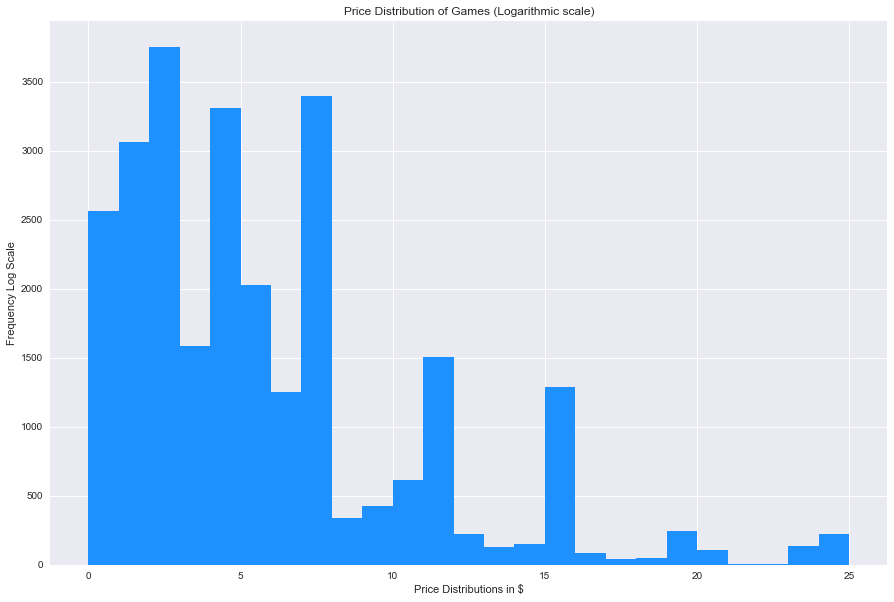

In [26]:
df_for_graphs = games_df.copy()

#remove outliers(keep items within +/- 3 std deviations)
df_for_distribution = df_for_graphs[np.abs(df_for_graphs.price-df_for_graphs.price.mean()) <= (3*df_for_graphs.price.std())].copy()
df_for_distribution["rounded_price"] = df_for_distribution["price"].round(0)

plt.figure(figsize=(15,10))
plt.style.use('seaborn')
plt.hist(df_for_distribution["rounded_price"], color="dodgerblue", bins = range(26))
plt.title('Price Distribution of Games (Logarithmic scale)')
plt.ylabel("Frequency Log Scale")
plt.xlabel("Price Distributions in $")
plt.show()

### Does the category (multiplayer or singleplayer) affect the price of a game?

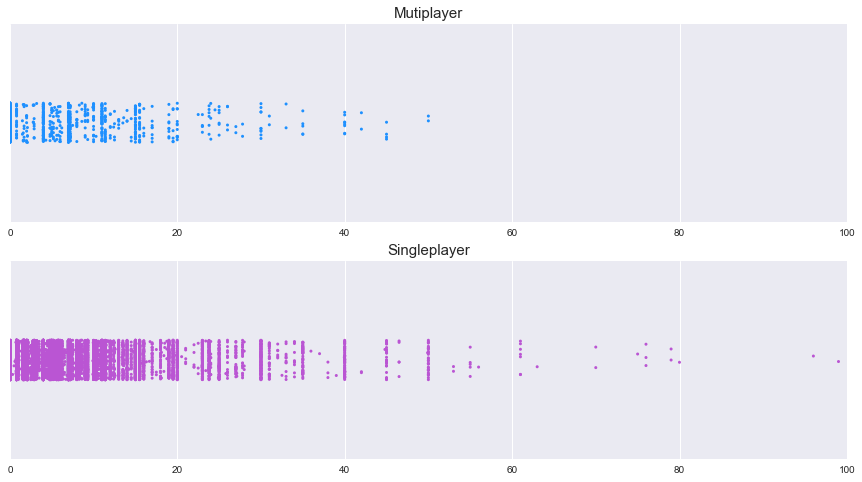

In [5]:
xrange = [0,100]
fsize = 15

plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
plt.xlim(xrange)
mutiplayer_games = df_for_graphs[df_for_graphs['steamspy_tags'].str.contains("Multiplayer|Co-op")]
sns.stripplot(data=mutiplayer_games, x='price', jitter= True, orient ='h', size=3, color='dodgerblue')
plt.title('Mutiplayer',fontsize=fsize)
plt.xlabel('') 

plt.subplot(2,1,2)
plt.xlim(xrange)
singleplayer_games = df_for_graphs[~df_for_graphs['steamspy_tags'].str.contains("Multiplayer|Co-op")]
sns.stripplot(data=singleplayer_games, x='price', jitter= True, orient ='h', size=3, color='mediumorchid')
plt.title('Singleplayer',fontsize=fsize)
plt.xlabel('') 

plt.show()

Singleplayer games have a higher price ceiling but the average game price is still under $10 for either

In [6]:
print("The mean average price of a multiplayer game is ${}".format(round(mutiplayer_games['price'].mean(),2)))
print("The mean average price of a singleplayer game is ${}".format(round(singleplayer_games['price'].mean(),2)))
print("The median average price of a multiplayer game is ${}".format(round(mutiplayer_games['price'].median(),2)))
print("The median average price of a singleplayer game is ${}".format(round(singleplayer_games['price'].median(),2)))

The mean average price of a multiplayer game is $7.07
The mean average price of a singleplayer game is $6.04
The median average price of a multiplayer game is $3.99
The median average price of a singleplayer game is $3.99


Insights:
- $3.99 is the most popular pricepoint for a game on Steam

# Exploring popular publishers

In [7]:
#average price of games by popular publishers
valve_games = games_df[games_df["publisher"] == "Valve"]
ubisoft_games = games_df[games_df["publisher"] == "Ubisoft"]
activision_games = games_df[games_df["publisher"] == "Activision"]
twok_games = games_df[games_df["publisher"] == "2K"]
ea_games = games_df[games_df["publisher"] == "Electronic Arts"]
bethesda_games = games_df[games_df["publisher"] == "Bethesda Softworks"]
rockstar_games = games_df[games_df["publisher"] == "Rockstar Games"]

publisher_list = [valve_games, ubisoft_games, activision_games, twok_games, ea_games, bethesda_games, rockstar_games]
data = []
for publisher in publisher_list:
    avgs = []
    avgs.append(publisher.iat[0,5])
    avgs.append(round(publisher['price'].mean(),2))
    avgs.append(round(publisher['price'].median(),2))
    data.append(avgs)

pd.DataFrame(data, columns = ["Publisher", "Mean Price ($)", "Median Price ($)"])


,Publisher,Mean Price ($),Median Price ($)
0,Valve,4.48,3.99
1,Ubisoft,16.48,12.49
2,Activision,13.81,7.99
3,2K,13.14,5.99
4,Electronic Arts,12.43,9.99
5,Bethesda Softworks,14.56,12.99
6,Rockstar Games,11.32,9.99


Insights:
- The mean price for a Valve game is much lower than the other publishers
- Excluding Valve, these major publishers have a mean price of $13.62, which is almost double the mean average price of all games on Steam

In [8]:
data = []
for publisher in publisher_list:
    details = []
    details.append(publisher.iat[0,5])
    details.append(len(publisher.loc[publisher['price'] == 0.0]))
    details.append(len(publisher.loc[publisher['price'] != 0.0]))
    details.append(len(publisher))
    details.append(round(len(publisher.loc[publisher['price'] == 0.0])/(len(publisher)),2)*100)
    release_years = publisher['release_date'].tolist()
    release_years = [int(x[0:4]) for x in release_years]
    details.append(round(sum(release_years)/len(release_years),2))
    data.append(details)
publisher_games_df = pd.DataFrame(data, columns = ["Publisher", "Free Games", "Paid Games", "Total Games", "% of Free Games", "Mean Release Year"])
publisher_games_df      

,Publisher,Free Games,Paid Games,Total Games,% of Free Games,Mean Release Year
0,Valve,9,21,30,30.0,2006.13
1,Ubisoft,4,107,111,4.0,2012.67
2,Activision,0,44,44,0.0,2013.50
3,2K,1,45,46,2.0,2012.22
4,Electronic Arts,0,32,32,0.0,2009.50
5,Bethesda Softworks,5,30,35,14.0,2013.66
6,Rockstar Games,2,13,15,13.0,2009.87


Insights:
- Valve has the highest percentage of free games compared to other popular publishers
- The average Valve game is much older

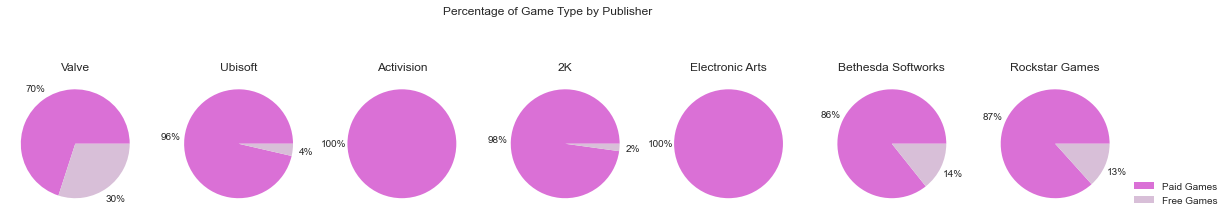

In [9]:
plt.figure(figsize=(20,4))
palette_color = ["orchid", 'thistle']
labels = ["Paid Games", "Free Games"]

for n in range(7):
    plt.subplot(1,7,n+1)
    data = [publisher_games_df.at[n,"Paid Games"],publisher_games_df.at[n,"Free Games"]]
    if data[1] == 0: data.pop()
    plt.pie(data, colors=palette_color, autopct='%.0f%%', pctdistance=1.25)
    plt.title(publisher_games_df.at[n,"Publisher"])

plt.legend(labels, bbox_to_anchor=(1.05, 0.25), loc=2, borderaxespad=0.)
plt.suptitle('Percentage of Game Type by Publisher')
plt.show()

### Does release year affect pricing?

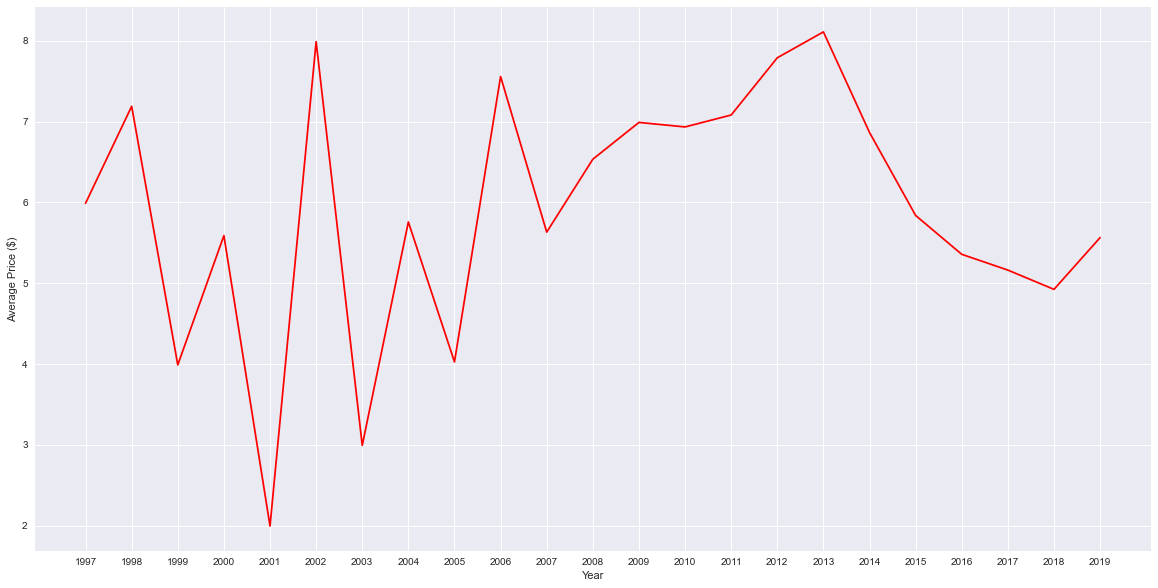

In [10]:

release_years = df_for_distribution['release_date'].tolist()
release_years = [int(x[0:4]) for x in release_years]

games_df_graph = df_for_distribution.copy()

games_df_graph.loc[:,"release_year"] = release_years

g = games_df_graph.groupby(['release_year']).mean().reset_index()

release_years = g["release_year"].tolist()
prices = g["price"].tolist()

plt.style.use("seaborn")
plt.figure(figsize=(20,10))
plt.xticks(range(min(release_years),max(release_years)+1,1))
plt.yticks(np.arange(0,max(prices)+1,1.00))
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.plot(release_years, prices, color="red", alpha=1)
plt.show()

It can be seen that there is no correlation between release year and price

# Exploring game play time


In [11]:
#remove outliers (keep only items +/-3 std deviations)
df_for_playtime = df_for_graphs[np.abs(df_for_graphs.average_playtime-df_for_graphs.average_playtime.mean()) <= (3*df_for_graphs.average_playtime.std())]
df_for_playtime = df_for_playtime.sort_values("average_playtime", ascending=False)
df_for_playtime.head(n=10)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
16208,681660,Bless Online,2018-10-23,1,NEOWIZ BLESS STUDIO,NEOWIZ,windows,0,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Free to Play;Massively Multip...,MMORPG;Open World;Massively Multiplayer,55,3960,5806,5598,8392,200000-500000,0.00
1120,105600,Terraria,2011-05-16,1,Re-Logic,Re-Logic,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Indie;RPG,Sandbox;Adventure;Survival,88,255600,7797,5585,1840,5000000-10000000,6.99
3859,322170,Geometry Dash,2014-12-22,1,RobTop Games,RobTop Games,windows;mac,0,Single-player;Steam Achievements;Steam Trading...,Action;Indie,Difficult;Great Soundtrack;Music,120,52737,2990,5546,1471,1000000-2000000,2.79
4432,339600,VEGA Conflict,2015-12-14,1,KIXEYE,KIXEYE,windows;mac,0,Multi-player;MMO;Cross-Platform Multiplayer;St...,Free to Play;Massively Multiplayer;Strategy,Free to Play;Space;Strategy,39,1471,1322,5448,8166,500000-1000000,0.00
13807,606800,Startup Company,2017-08-11,1,Hovgaard Games,Hovgaard Games,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie;Simulation;Strategy;Early Access,Early Access;Simulation;Management,20,1826,525,5442,7362,200000-500000,6.99
6497,393420,Hurtworld,2015-12-03,1,Bankroll Studios,Bankroll Studios,windows;mac,0,Multi-player;Co-op;Cross-Platform Multiplayer,Action;Adventure;Simulation;Early Access,Early Access;Survival;Open World,0,15574,5362,5439,7099,500000-1000000,19.49
10553,515910,Hooligan Vasja,2016-08-19,1,Trident Game Studio,Trident Game Studio,windows,0,Single-player;Steam Achievements;Steam Trading...,Action;Casual;Indie,Indie;Casual;Action,25,92,48,5402,10579,50000-100000,0.79
1772,238960,Path of Exile,2013-10-23,1,Grinding Gear Games,Grinding Gear Games,windows,0,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Free to Play;Indie;Massively ...,Free to Play;Action RPG;Hack and Slash,120,71593,6117,5263,492,10000000-20000000,0.00
4288,335820,Dream Of Mirror Online,2015-08-14,1,SoftStar,SubaGames,windows,0,MMO;Steam Trading Cards,Adventure;Free to Play;Massively Multiplayer;RPG,Free to Play;Massively Multiplayer;Anime,0,242,211,5237,10470,100000-200000,0.00
10326,510660,Big Bang Empire,2016-08-23,1,Playata GmbH,European Games Group AG,windows,16,Single-player;MMO;Cross-Platform Multiplayer;I...,Adventure;Casual;Free to Play;Indie;Massively ...,Nudity;Sexual Content;Mature,0,398,260,5193,5193,100000-200000,0.00


Insights:
- All of the top 10 games are in English
- All of the top 10 games have at least 50000 owners
- Except for the game with the most average playtime, Bless Online, every game has more positive reviews than negative ones

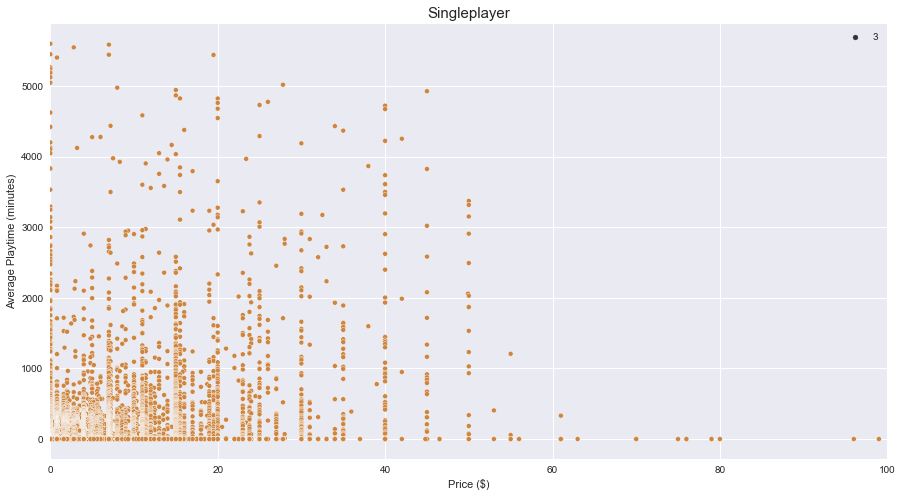

In [12]:
xrange = [0,100]

plt.figure(figsize=(15,8))
plt.xlim(xrange)
singleplayer_games = df_for_playtime
sns.scatterplot(data=singleplayer_games, x='price', y = 'average_playtime', color='peru', size = 3)
plt.title('Singleplayer', fontsize=15)
plt.xlabel('Price ($)') 
plt.ylabel("Average Playtime (minutes)")

plt.show()

Insights:
- There is no direct correlation between game price and playtime, although the most expensive games are played the least on average

### Is there a correlation between playtime and game rating?

In [13]:
positive_games =  df_for_playtime.loc[games_df["positive_ratings"] > games_df["negative_ratings"]]
negative_games =  df_for_playtime.loc[games_df["positive_ratings"] <= games_df["negative_ratings"]] #include games with same amount of either rating as negative

print("There are {} games with a positive rating".format(len(positive_games)))
print("There are {} games with a negative rating".format(len(negative_games)))

There are 21835 games with a positive rating
There are 5148 games with a negative rating


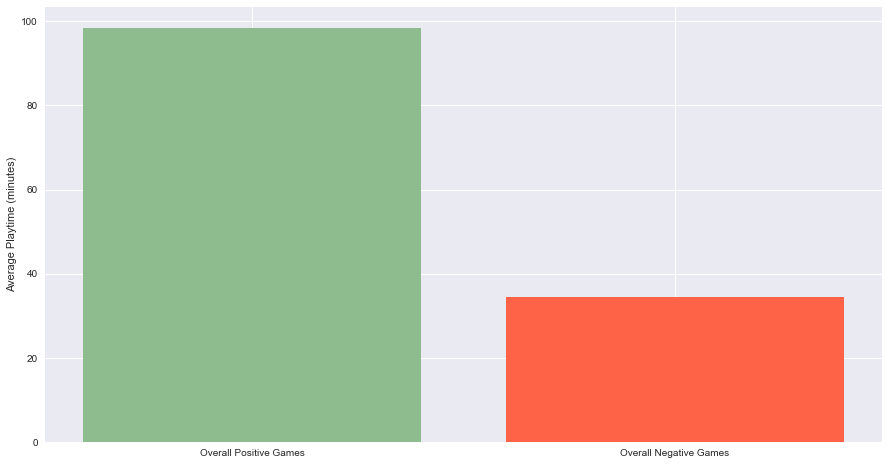

In [14]:
plt.figure(figsize=(15,8))
x = ["Overall Positive Games", "Overall Negative Games"]
bars = [positive_games["average_playtime"].mean(), negative_games["average_playtime"].mean()]
plt.bar(x, bars, align='center', alpha=1, color = ("darkseagreen","tomato"))
plt.ylabel("Average Playtime (minutes)")
plt.show()

Insights:
- Games with more positive than negative ratings have an average playtime around 3 times haigher than games with more negative ratings than positive

### What about genre and playtime?

In [15]:
action = games_df[games_df['genres'].str.contains("Action")]
adventure = games_df[games_df['genres'].str.contains("Adventure")]
indie = games_df[games_df['genres'].str.contains("Indie")]
rpg = games_df[games_df['genres'].str.contains("RPG")]
strategy = games_df[games_df['genres'].str.contains("Strategy")]
casual = games_df[games_df['genres'].str.contains("Casual")]
sports = games_df[games_df['genres'].str.contains("Sports")]

genrelist = [action, adventure, indie, rpg, strategy, casual,sports]
genreliststring = ["Action", "Adventure", "Indie", "RPG", "Strategy", "Casual","Sports"]
count = 0
genredata = []
for genre in genrelist:
    genredetails = []
    genredetails.append(genreliststring[count])
    genredetails.append(len(genre))
    genre_positive =  genre.loc[genre["positive_ratings"] > genre["negative_ratings"]]
    genre_negative =  genre.loc[genre["positive_ratings"] <= genre["negative_ratings"]]
    genredetails.append(len(genre_positive))
    genredetails.append(len(genre_negative))
    genredetails.append(round((len(genre_positive)/len(genre)*100),2))
    genredetails.append(genre["average_playtime"].mean())
    genredata.append(genredetails)

    count += 1

genre_df = pd.DataFrame(genredata, columns = ["Genre", "Total Games", "Positive Rated Games", "Negative Rated Games", "% Rated Positive", "Average Playtime"])
genre_df.sort_values(by=["Average Playtime"], ascending= False)


,Genre,Total Games,Positive Rated Games,Negative Rated Games,% Rated Positive,Average Playtime
3,RPG,4311,3592,719,83.32,276.985850
4,Strategy,5247,4208,1039,80.20,193.130170
1,Adventure,10032,8149,1883,81.23,151.656699
0,Action,11903,9538,2365,80.13,144.016634
6,Sports,1322,1002,320,75.79,115.518154
2,Indie,19421,15819,3602,81.45,112.836105
5,Casual,10210,8074,2136,79.08,85.073751


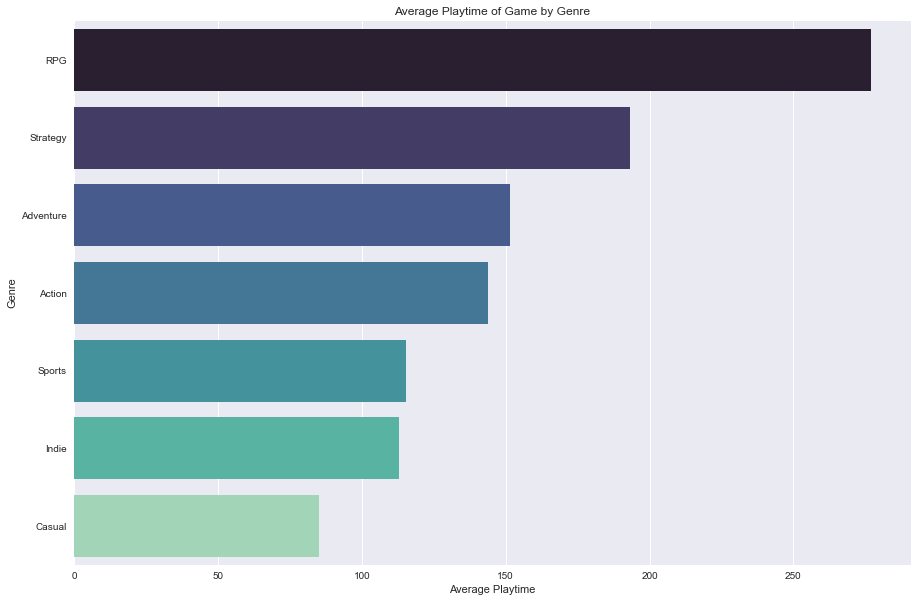

In [16]:
plt.figure(figsize=(15, 10))
sns.barplot(data=genre_df.sort_values(by=["Average Playtime"], ascending= False), x="Average Playtime", y="Genre", label="Total", palette="mako")
plt.title("Average Playtime of Game by Genre")
plt.show()

Insights:
- Casual (as expected), has the least average playtime
- Some games are multiple genres, (action + adventure is a common one), causing related genres to have similar playtimes